<a href="https://colab.research.google.com/github/Kiki2811/Kfac-pytorch-cola/blob/main/KFAC_PYTORCH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/n-gao/pytorch-kfac.git
%cd pytorch-kfac
!python setup.py install

Cloning into 'pytorch-kfac'...
remote: Enumerating objects: 161, done.
remote: Counting objects: 100% (53/53), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 161 (delta 42), reused 32 (delta 32), pack-reused 108 (from 1)
Receiving objects: 100% (161/161), 196.36 KiB | 24.54 MiB/s, done.
Resolving deltas: 100% (76/76), done.
/content/pytorch-kfac
running install
/usr/local/lib/python3.12/dist-packages/setuptools/_distutils/cmd.py:66: SetuptoolsDeprecationWarning: setup.py install is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` directly.
        Instead, use pypa/build, pypa/installer or other
        standards-based tools.

        See https://blog.ganssle.io/articles/2021/10/setup-py-deprecated.html for details.
        ********************************************************************************

!!
  self.initialize_options()
/usr/local/lib/python3.12/dist-pa

In [ ]:
# Imports and Setup
import torch
import torch.nn as nn
import torchvision
from torchvision import datasets, transforms
from torch_kfac import KFAC
import tqdm
import matplotlib.pyplot as plt

In [ ]:
# MNIST Dataset Preparation
batch_size = 1024
epochs = 10

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

dataset1 = datasets.MNIST('../data', train=True, download=True, transform=transform)
dataset2 = datasets.MNIST('../data', train=False, transform=transform)

train_loader = torch.utils.data.DataLoader(dataset1, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset2, batch_size=batch_size)

# Model Definition for MNIST
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.convolutions = nn.Sequential(
            nn.Conv2d(1, 2, (7, 7)),
            nn.Tanh(),
            nn.Conv2d(2, 4, (7, 7)),
            nn.Tanh(),
            nn.Conv2d(4, 4, (7, 7)),
            nn.Tanh(),
            nn.Conv2d(4, 8, (7, 7)),
            nn.Tanh(),
        )
        self.head = nn.Linear(128, 10)

    def forward(self, x):
        out = self.convolutions(x).reshape(x.shape[0], -1)
        return self.head(out)

100%|██████████| 9.91M/9.91M [00:00<00:00, 18.4MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 492kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.53MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 10.1MB/s]


In [ ]:
import torchvision.transforms as transforms
# CIFAR10 Dataset Preparation
# Device setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Transform: normalize images to [-1, 1] range
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Training set
train_dataset = torchvision.datasets.CIFAR10(
    root='./data',
    train=True,
    download=True,
    transform=transform
)
train_loader = torch.utils.data.DataLoader(
    train_dataset,
    batch_size = 1024,
    shuffle=True,
    num_workers=2
)

# Test set
test_dataset = torchvision.datasets.CIFAR10(
    root='./data',
    train=False,
    download=True,
    transform=transform
)
test_loader = torch.utils.data.DataLoader(
    test_dataset,
    batch_size = 1024,
    shuffle=False,
    num_workers=2
)

print(f"Train batches: {len(train_loader)} | Test batches: {len(test_loader)}")

# Model Definition for CIFAR10
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.convolutions = nn.Sequential(
            nn.Conv2d(3, 16, (3, 3), padding=1),   # 3 → 16 channels
            nn.ReLU(),
            nn.Conv2d(16, 32, (3, 3), padding=1),  # 16 → 32 channels
            nn.ReLU(),
            nn.MaxPool2d(2, 2),  # downsample 32x32 → 16x16
            nn.Conv2d(32, 64, (3, 3), padding=1),  # 32 → 64 channels
            nn.ReLU(),
            nn.MaxPool2d(2, 2),  # 16x16 → 8x8
        )
        self.head = nn.Linear(64 * 8 * 8, 10)  # CIFAR-10 has 10 classes

    def forward(self, x):
        out = self.convolutions(x).reshape(x.shape[0], -1)
        return self.head(out)

Train batches: 391 | Test batches: 79


In [ ]:
import torchvision.transforms as transforms
# FashionMNIST Dataset Preparation
# Device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Transform: convert to tensor and normalize
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # grayscale images, single channel
])

# Training set
train_dataset = torchvision.datasets.FashionMNIST(
    root='./data',
    train=True,
    download=True,
    transform=transform
)
train_loader = torch.utils.data.DataLoader(
    train_dataset,
    batch_size = 1024,
    shuffle=True,
    num_workers=2,
    pin_memory=True
)

# Test set
test_dataset = torchvision.datasets.FashionMNIST(
    root='./data',
    train=False,
    download=True,
    transform=transform
)
test_loader = torch.utils.data.DataLoader(
    test_dataset,
    batch_size = 1024,
    shuffle=False,
    num_workers=2,
    pin_memory=True
)

print(f"Train batches: {len(train_loader)} | Test batches: {len(test_loader)}")

# Model Definition for FashionMNIST
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.convolutions = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=3, padding=1),  # input 1 channel
            nn.ReLU(),
            nn.Conv2d(16, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),  # downsample 28x28 -> 14x14
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),  # downsample 14x14 -> 7x7
        )
        self.head = nn.Linear(64*7*7, 10)  # 10 classes

    def forward(self, x):
        out = self.convolutions(x).reshape(x.shape[0], -1)
        return self.head(out)

100%|██████████| 26.4M/26.4M [00:02<00:00, 11.1MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 176kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 3.23MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 13.7MB/s]

Train batches: 59 | Test batches: 10


In [ ]:
epochs = 10
loss_fn = nn.CrossEntropyLoss(reduction='mean')
# KFAC Training with Model Distribution
def train_kfac_model_distribution(train_loader):
    model = Classifier().cuda()
    optim = KFAC(
    model,
    learning_rate =1e-3,                 # lower LR
    damping=1e-1,            # higher damping
    momentum_type='regular',
    momentum=0.95,
    adapt_damping=False,     # disable auto-damping
    update_cov_manually=False
)

    losses = []
    for _ in range(epochs):
        for inp, labels in tqdm.tqdm(train_loader):
            inp, labels = inp.cuda(), labels.cuda()
            model.zero_grad()
            with optim.track_forward():
                out = model(inp)
                out_samples = torch.multinomial(torch.softmax(out.detach(), 1), 1).reshape(out.shape[0])
                loss = loss_fn(out, out_samples)
            with optim.track_backward():
                loss.backward()
            optim.update_cov()
            model.zero_grad()
            out = model(inp)
            loss = loss_fn(out, labels)
            loss.backward()
            optim.step(loss=loss)
            losses.append(loss.item())
    return model, losses

# KFAC Training with Data Distribution
def train_kfac_data_distribution(train_loader):
    model = Classifier().cuda()
    optim = KFAC(
    model,
    learning_rate =1e-3,                 # lower LR
    damping=1e-1,            # higher damping
    momentum_type='regular',
    momentum=0.95,
    adapt_damping=False,     # disable auto-damping
    update_cov_manually=False
)
    losses = []
    for _ in range(10):
        for inp, labels in tqdm.tqdm(train_loader):
            inp, labels = inp.cuda(), labels.cuda()
            model.zero_grad()
            with optim.track_forward():
                out = model(inp)
                loss = loss_fn(out, labels)
            with optim.track_backward():
                loss.backward()
            optim.step(loss=loss)
            losses.append(loss.item())
    return model, losses

# SGD Training
def train_sgd(train_loader):
    model = Classifier().cuda()
    optim = torch.optim.SGD(model.parameters(), lr=0.01)  # SGD with learning rate
    losses = []

    for _ in range(10):  # number of epochs
        for inp, labels in tqdm.tqdm(train_loader):
            inp, labels = inp.cuda(), labels.cuda()
            model.zero_grad()
            out = model(inp)
            loss = loss_fn(out, labels)
            loss.backward()
            optim.step()
            losses.append(loss.item())

    return model, losses



100%|██████████| 49/49 [00:11<00:00,  4.33it/s]


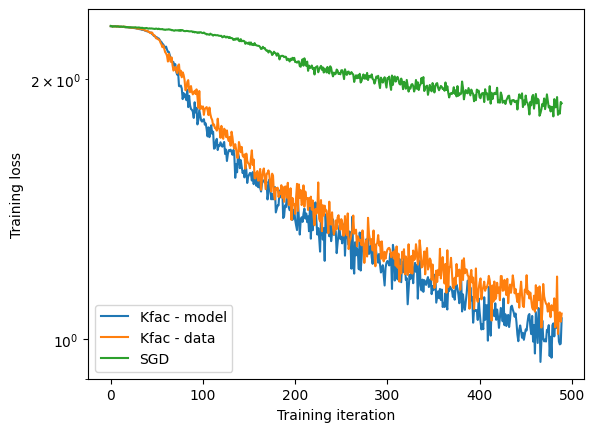

In [ ]:
# Plotting Function
def plot_losses(kfac_model_losses, kfac_data_losses, SGD_losses):
    plt.plot(kfac_model_losses)
    plt.plot(kfac_data_losses)
    plt.plot(SGD_losses)
    plt.xlabel('Training iteration')
    plt.ylabel('Training loss')
    plt.yscale('log')
    plt.legend(['Kfac - model', 'Kfac - data', 'SGD'])
    plt.show()

# Example Execution
if __name__ == "__main__":
    kfac_model, kfac_model_losses = train_kfac_model_distribution(train_loader)
    kfac_data_model, kfac_data_losses = train_kfac_data_distribution(train_loader)
    SGD_model, SGD_losses = train_sgd(train_loader)
    plot_losses(kfac_model_losses, kfac_data_losses, SGD_losses)

In [ ]:
kfac_model_losses = []
kfac_data_losses = []
SGD_losses = []

for inp, labels in tqdm.tqdm(test_loader):
  inp, labels = inp.cuda(), labels.cuda()
  kfac_model_loss = loss_fn(kfac_model(inp), labels)
  kfac_model_losses.append(kfac_model_loss.item())
  kfac_data_loss = loss_fn(kfac_data_model(inp), labels)
  kfac_data_losses.append(kfac_data_loss.item())
  SGD_loss = loss_fn(SGD_model(inp), labels)
  SGD_losses.append(SGD_loss.item())

plot_losses(kfac_model_losses, kfac_data_losses, SGD_losses)
